## 1. Importing Libraries

In [4]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


#resampling library
from imblearn.over_sampling import SMOTE

#feature scaling library
from sklearn.preprocessing import StandardScaler

#libtune to tune model, get different metric score
from collections import Counter
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
%matplotlib inline

## 2. Data loading and overview

<font color='cyan'>Let's start by reading in the Car_Insurance_Data csv file into a pandas dataframe.</font>

In [5]:
df = pd.read_csv("/content/drive/Shareddrives/my_workspace/dataset/Car_Insurance_Claim.csv")

In [ ]:
##shape of the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.') 

The dataset has 10000 rows and 19 columns.


In [ ]:
#print first five rows
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
#Check the info of the data set which describes null values, data type, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

``float64``, ``int64``, and ``object`` are the data types of our features.

In [ ]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


> Check the description of the data set which describes the minimum value, maximum value, mean value, total count, standard deviation etc.

# 3. Exploratory Data Analysis
> In this section, we will be doing some basic Exploratory Data Analysis to get the "feel" of the data, we will be checking the distributions, the correlations etc of the different columns

### 3.1 Missing Data

<font color='cyan'>We can use seaborn to create a simple heatmap to see where we are missing data!</font>

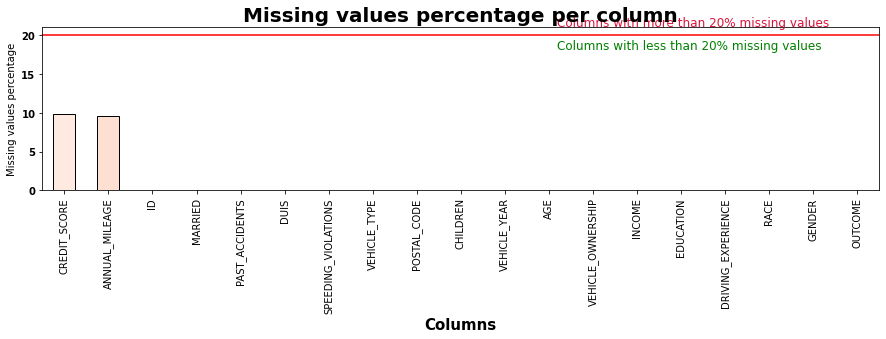

In [ ]:
def msv_1(df, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (df.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(df.isnull().sum()/len(df))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

In [ ]:
print(f'There are {df.isnull().any().sum()} columns in car insurance dataset with missing values.')

There are 2 columns in car insurance dataset with missing values.


> Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values.



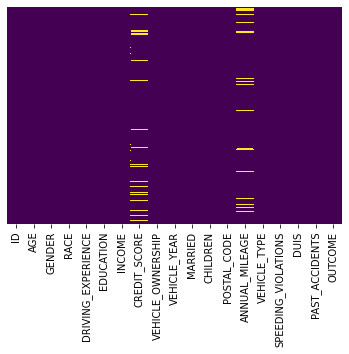

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> Missing values Occurs!

> Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [ ]:
#missing data
df.isnull().sum().sort_values(ascending=False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

## 3.2 Data Exploration

In [ ]:
df.OUTCOME.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

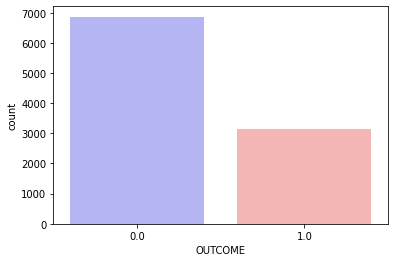

In [ ]:
sns.countplot(x="OUTCOME", data=df, palette="bwr")
plt.show()

In [ ]:
dont_claim_loan = len(df[df.OUTCOME == 1])
claim_loan = len(df[df.OUTCOME == 0])
print("Percentage of people who apply for a loan: {:.2f}%".format((dont_claim_loan / (len(df.OUTCOME))*100)))
print("Percentage of people who did not apply for a loan: {:.2f}%".format((claim_loan / (len(df.OUTCOME))*100)))

Percentage of people who apply for a loan: 31.33%
Percentage of people who did not apply for a loan: 68.67%


> * We have 31.33% persons who apply for a loan; And the 68.67% persons who did not apply for a loan, so our problem is somewhat imbalanced.

### Plots to analyze the Dataset 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7ade5f490>,
      dtype=object)

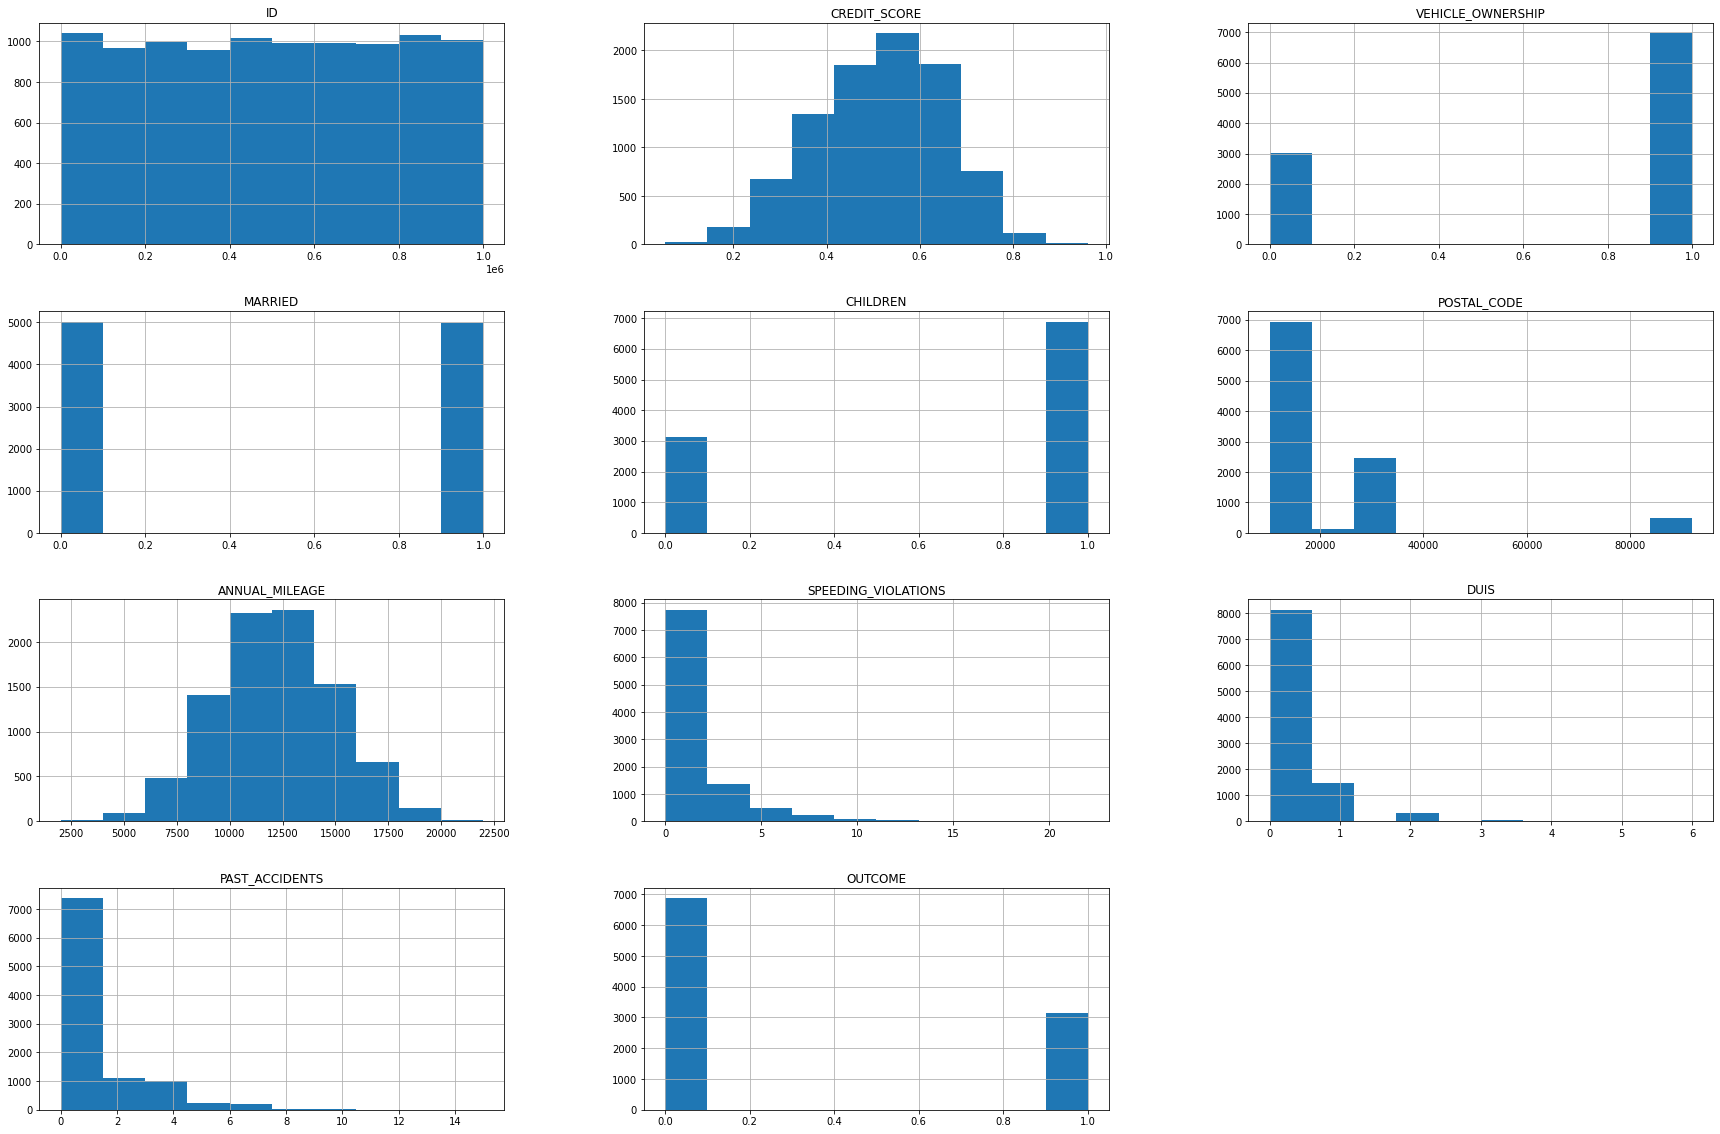

In [ ]:
# Histogram 
df.hist(figsize=(30,20))

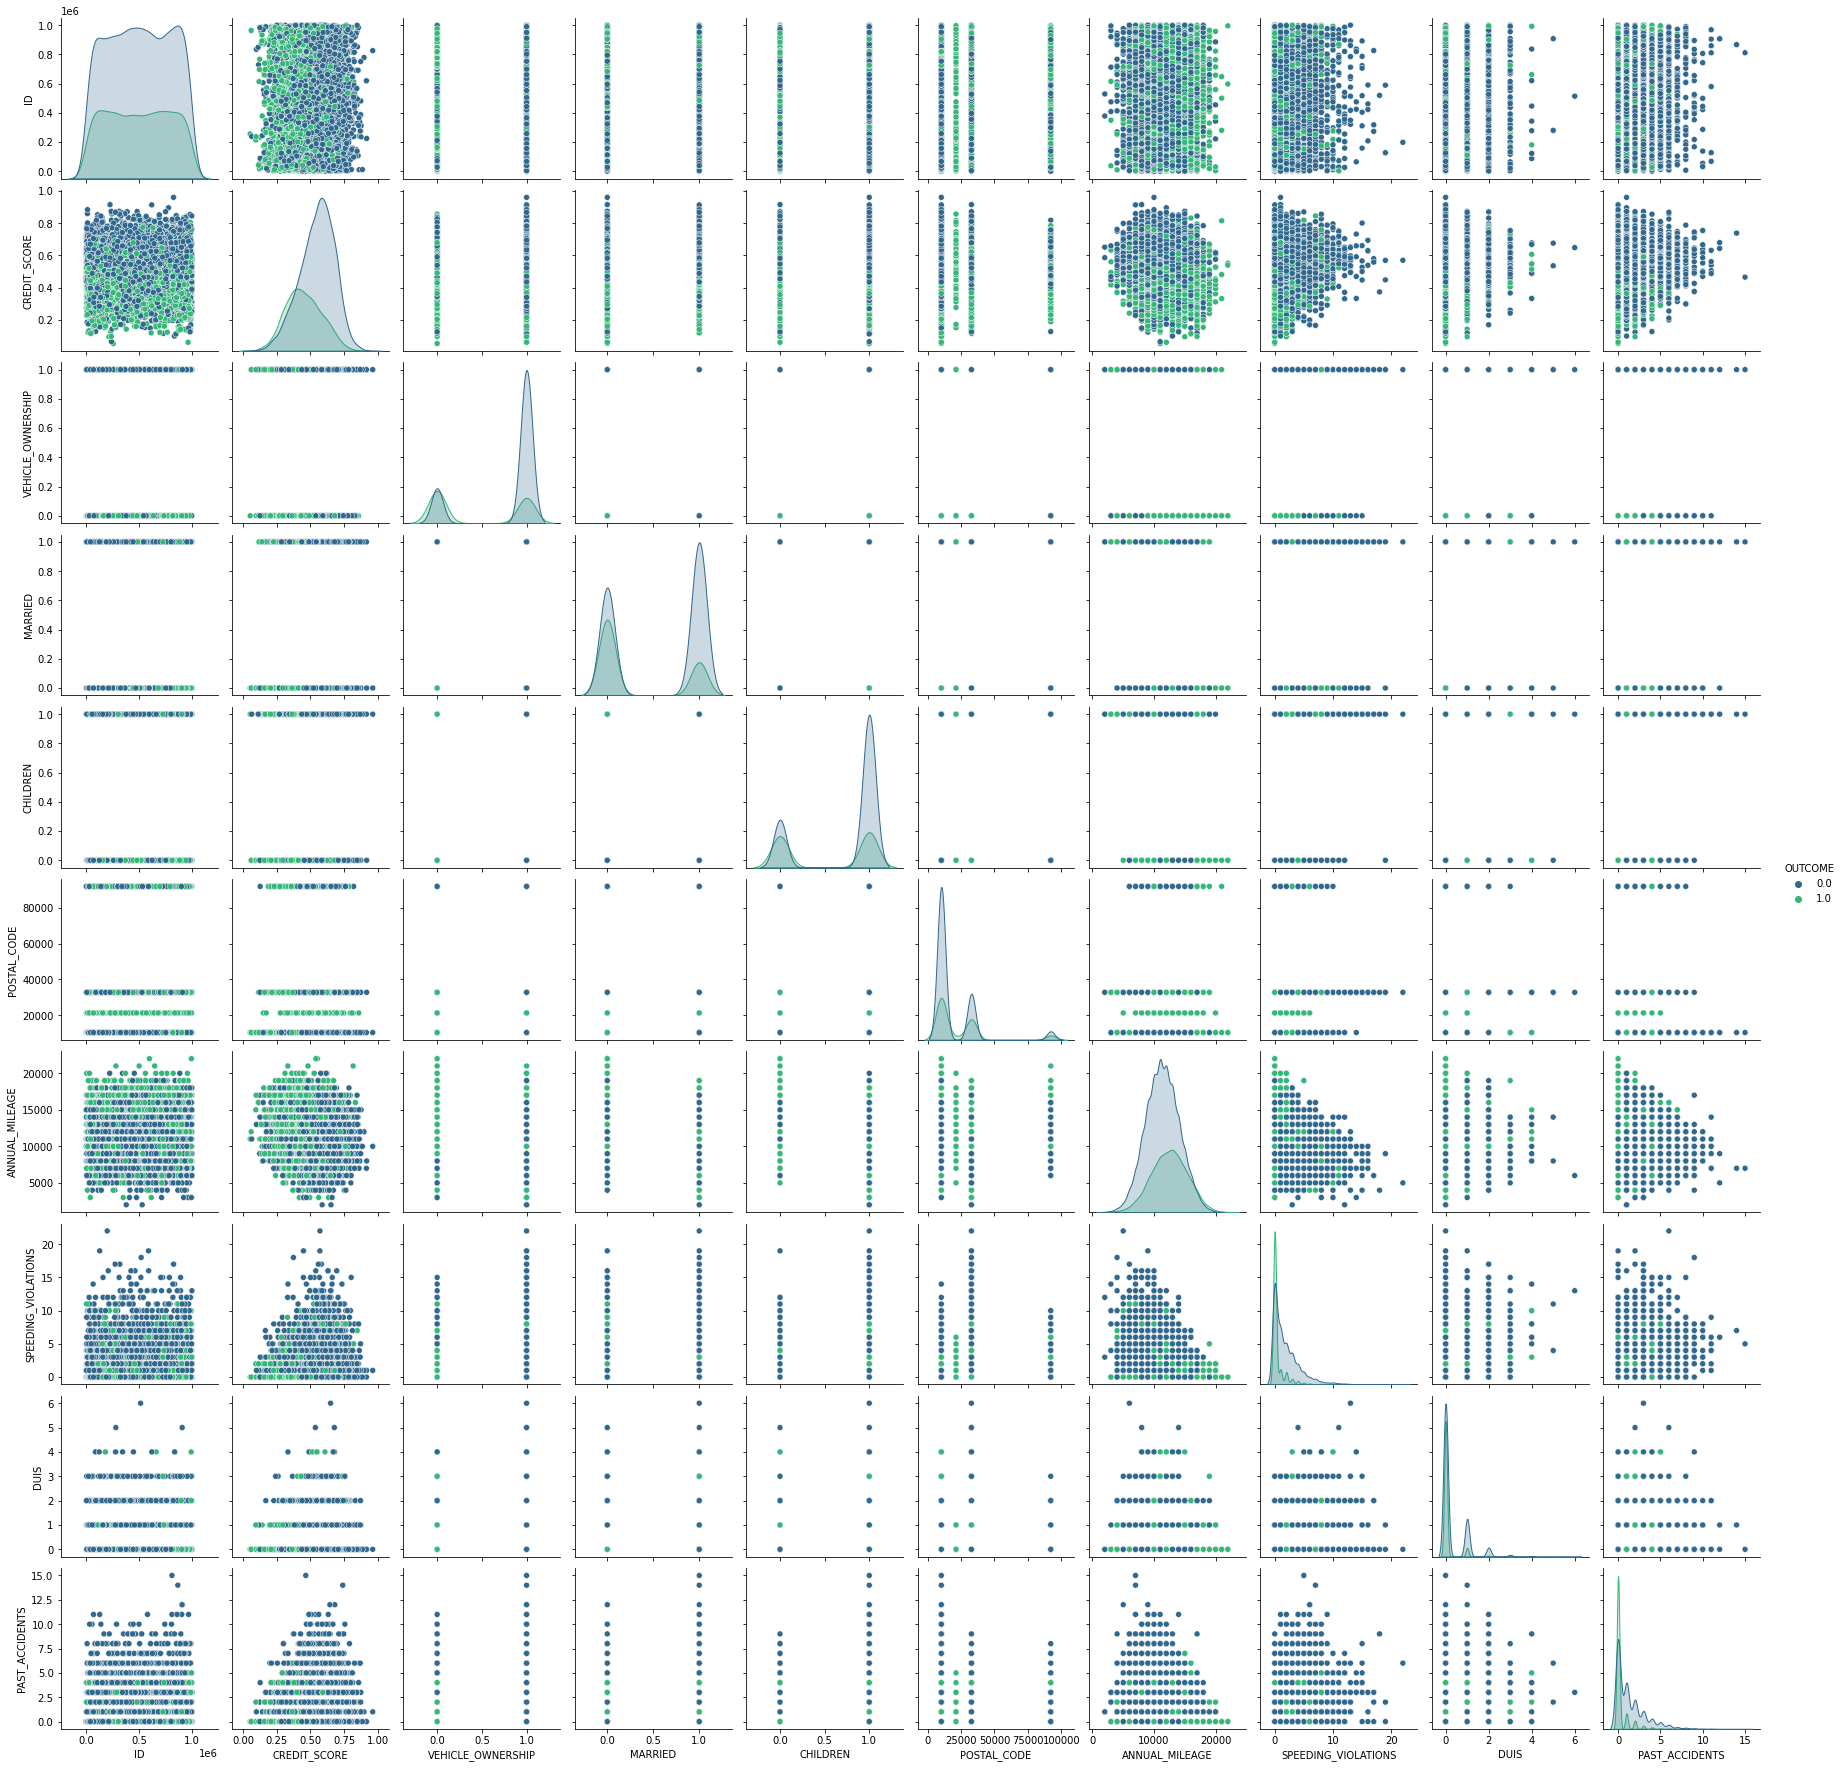

In [ ]:
# pairploting
sns.pairplot(df, hue="OUTCOME", palette="viridis");

### **Correlation with OUTCOME**

In [ ]:
df_corr = df.corr().transpose()
df_corr

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


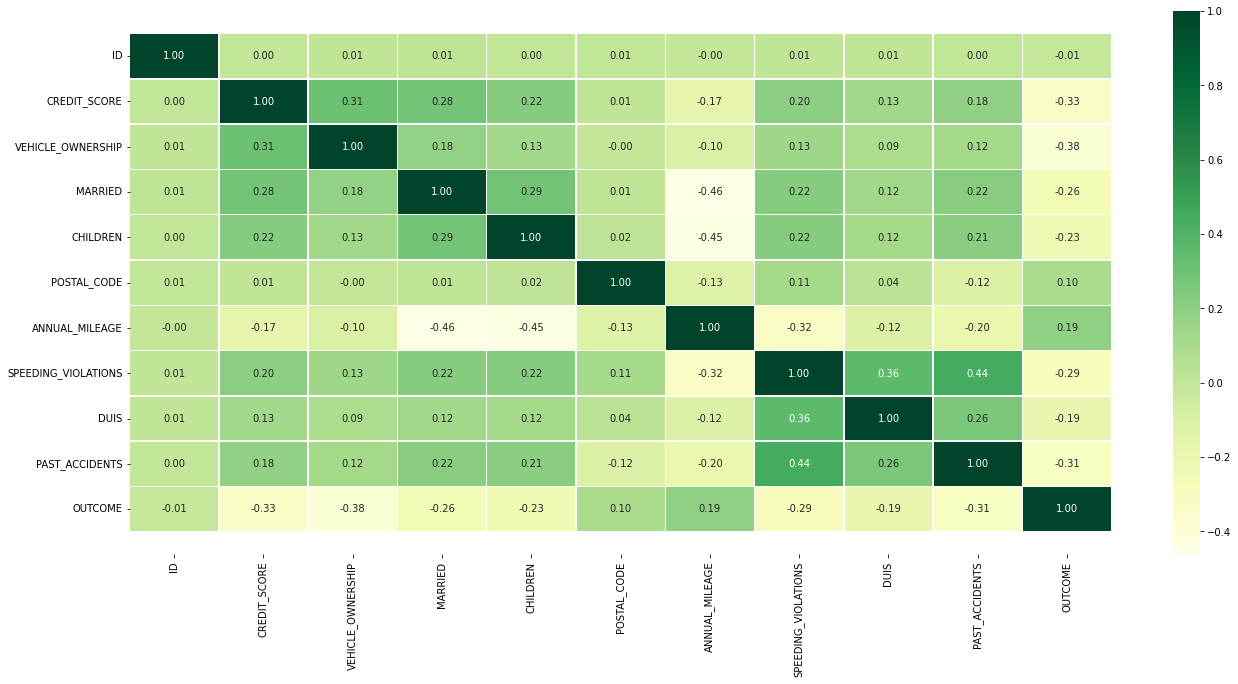

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

The correlation plot shows the relation between the parameters.


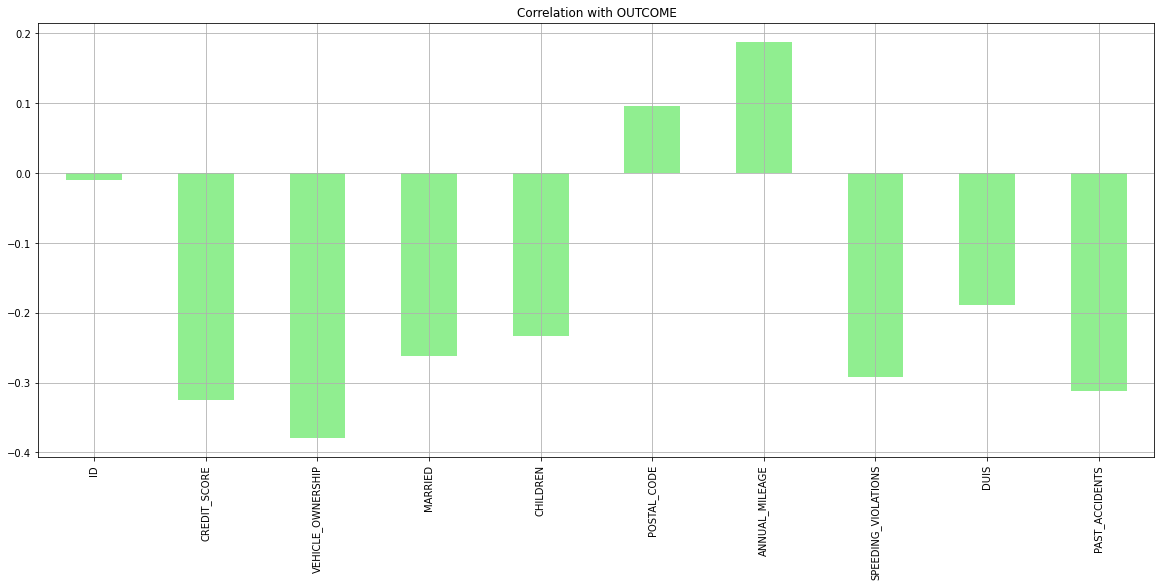

In [6]:
df.drop('OUTCOME', axis=1).corrwith(df.OUTCOME).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with OUTCOME",color="lightgreen");

---
***Observations from correlation:***
- *``POSTAL_CODE``, ``ID`` are the least correlated with the OUTCOME variable.*
- *All other variables have a significant correlation with the OUTCOME variable.*
---


### Relationship Between Age vs OUTCOME

In [ ]:
df["AGE"].replace({"16-25": "Young", "26-39": "Middle_Age","40-64":"Old","65+":"Very_Old"}, inplace=True)

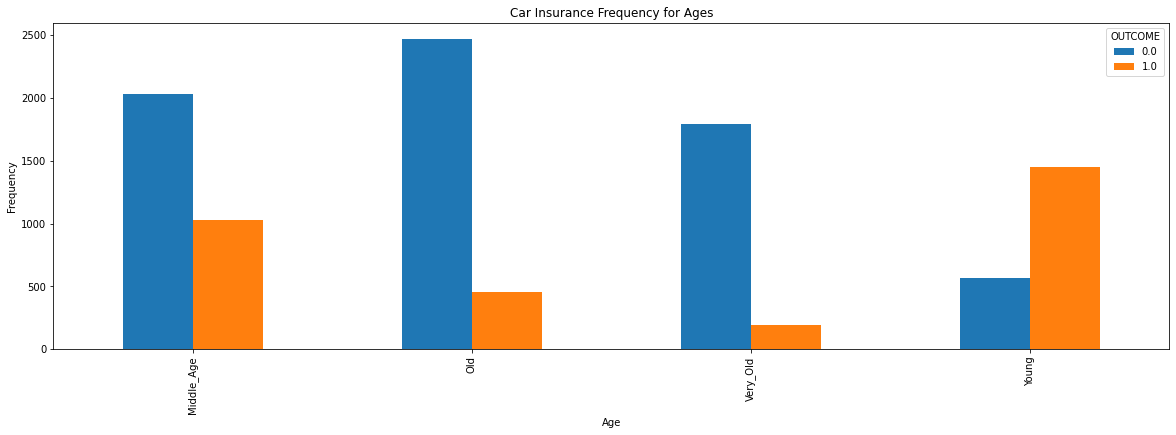

In [ ]:
pd.crosstab(df.AGE,df.OUTCOME).plot(kind="bar",figsize=(20,6))
plt.title('Car Insurance Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> Here the ``Young`` people are more likely to claimed loan

In [ ]:
pd.crosstab(df["OUTCOME"], df["AGE"])

AGE,Middle_Age,Old,Very_Old,Young
OUTCOME,,,,
0.0,2031,2474,1794,568
1.0,1032,457,196,1448


> As we can see, age has a significant impact on car_insurance_data, with the greatest impact occurring between the ages of ``Middle_Age`` and ``Old``.

### Relationship Between GENDER vs OUTCOME

Text(0.5, 1.0, 'Car_Insurance_Data Frequency for Gender')

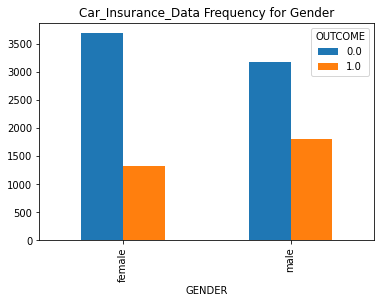

In [ ]:
pd.crosstab(df.GENDER, df.OUTCOME).plot(kind = 'bar')
plt.title("Car_Insurance_Data Frequency for Gender")

In [ ]:
pd.crosstab(df["OUTCOME"], df["GENDER"])

GENDER,female,male
OUTCOME,,
0.0,3689,3178
1.0,1321,1812


> According to the table, MALE are the most likely to claimed_loan than FEMALE.

### Relationship Income and OUTCOME

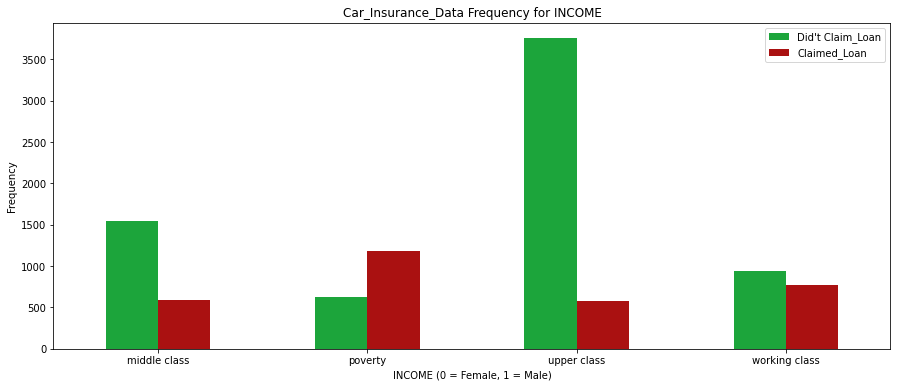

In [ ]:
pd.crosstab(df.INCOME,df.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Car_Insurance_Data Frequency for INCOME')
plt.xlabel('INCOME (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Did't Claim_Loan", "Claimed_Loan"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(df["OUTCOME"], df["INCOME"])

INCOME,middle class,poverty,upper class,working class
OUTCOME,,,,
0.0,1546,628,3757,936
1.0,592,1186,579,776


> We can observe that the POVERTY class is more likely to apply for a loan, while the higher class is the least likely to apply for one.

### Relationship Between Education and OUTCOME

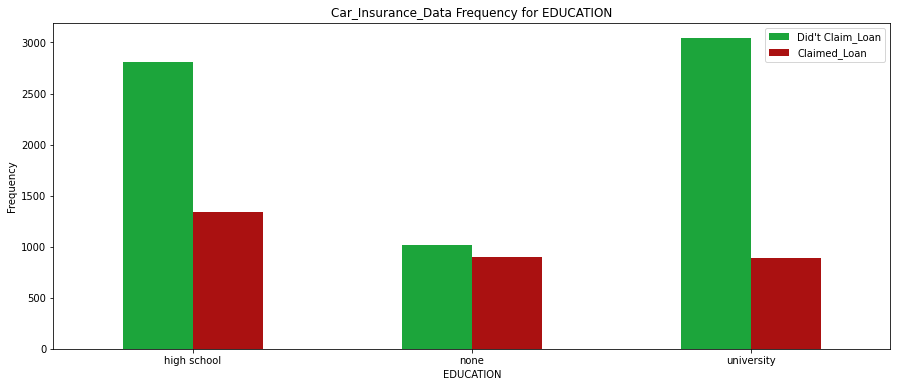

In [ ]:
pd.crosstab(df.EDUCATION,df.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Car_Insurance_Data Frequency for EDUCATION')
plt.xlabel('EDUCATION')
plt.xticks(rotation=0)
plt.legend(["Did't Claim_Loan", "Claimed_Loan"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(df["OUTCOME"], df["EDUCATION"])

EDUCATION,high school,none,university
OUTCOME,,,
0.0,2813,1012,3042
1.0,1344,903,886


> High school people are more likely to have claimed_loan.

###Relationship Between DRIVING_EXPERIENCE and OUTCOME

In [ ]:
df["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)

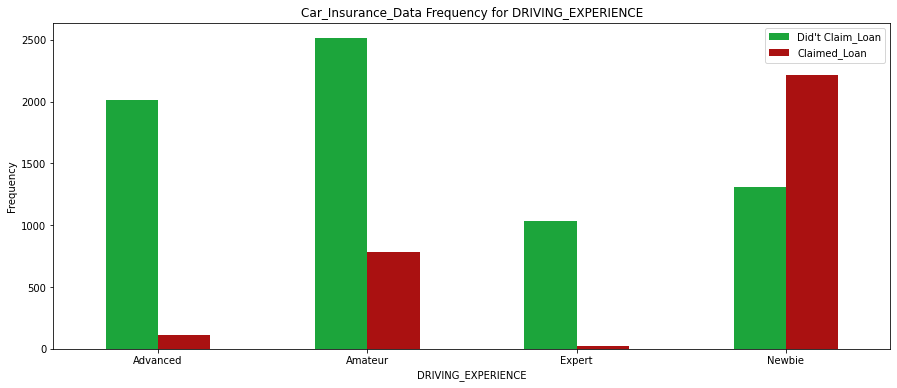

In [ ]:
pd.crosstab(df.DRIVING_EXPERIENCE,df.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Car_Insurance_Data Frequency for DRIVING_EXPERIENCE')
plt.xlabel('DRIVING_EXPERIENCE')
plt.xticks(rotation=0)
plt.legend(["Did't Claim_Loan", "Claimed_Loan"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(df["OUTCOME"], df["DRIVING_EXPERIENCE"])

DRIVING_EXPERIENCE,Advanced,Amateur,Expert,Newbie
OUTCOME,,,,
0.0,2010,2512,1032,1313
1.0,109,787,20,2217


> Newbie Driver has clamied loan by a wide margin.

# 4. Preprocessing

### 4.1 Data Cleaning

In [18]:
#missing data
df.isnull().sum().sort_values(ascending=False)

ID                     0
MARRIED                0
PAST_ACCIDENTS         0
DUIS                   0
SPEEDING_VIOLATIONS    0
VEHICLE_TYPE           0
ANNUAL_MILEAGE         0
POSTAL_CODE            0
CHILDREN               0
VEHICLE_YEAR           0
AGE                    0
VEHICLE_OWNERSHIP      0
CREDIT_SCORE           0
INCOME                 0
EDUCATION              0
DRIVING_EXPERIENCE     0
RACE                   0
GENDER                 0
OUTCOME                0
dtype: int64

In [19]:
def fillna(dataframe,feature_cols):
    total_cols=0
    for y in feature_cols:
        total_cols+=1
        if dataframe[y].isna().sum()>1:
            try:
                dataframe[y]=dataframe[y].fillna(int(np.mean(dataframe[y])))
            except ValueError:
                pass
        else:
            continue
    print(f"There are {total_cols} columns")

feature_cols=["CREDIT_SCORE","ANNUAL_MILEAGE"]
fillna(df,feature_cols)

There are 2 columns


### 4.2 Split Data

In [20]:
X = df.drop(['OUTCOME','ID'], axis=1)
y = df['OUTCOME']
X = pd.get_dummies(X, drop_first=True)

In [21]:
# Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# summarize the class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 2500})


> The distribution of observations in the target class is skewed (imbalanced data).

### 4.3 Feature Scaling

In [23]:
# Creating StandardScaler instance
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)

# Scaling data
X_test = sc.transform(X_test)

### 4.4 Sampling

In [24]:
# transform the training dataset
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [14]:
# summarize the new class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 2500})


> Now the data is Balanced

## 5. HyperParameter Tuning

### 5.1 Tuning The Models

> The GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifier(),[{'n_estimators':[100,150,200],'learning_rate':[0.1, 0.5, 0.8, 1],'algorithm':['SAMME', 'SAMME.R'], 'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':[100,150,200],'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7, 8, 10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 83.35%
Best Parameters :  {'C': 0.75, 'random_state': 0}

----------------

GaussianNB():
Best Accuracy : 77.11%
Best Parameters :  {'var_smoothing': 1e-09}

----------------

DecisionTreeClassifier():
Best Accuracy : 82.34%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 87.12%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}

----------------

AdaBoostClassifier():
Best Accuracy : 85.79%
Best Parameters :  {'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 100, 'random_state': 0}

----------------

GradientBoostingClassifier():
Best Accuracy : 85.15%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100, 'random_state': 0}

----------------

XGBClassifier():
Best Accuracy : 86.10%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.05}

----------------

KNe

## 5.2 Models after Tuning Hyperparameters 

After Grid Search, we got best parameters for all the models. Now, we going to tune hyperparameters see how to it perform. <br>

***True Positives (TP)*** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. <br>

***True Negatives (TN)*** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. <br>

***False Positives (FP)*** – When actual class is no and predicted class is yes. <br>

***False Negatives (FN)*** – When actual class is yes but predicted class in no. <br>

***Accuracy*** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Accuracy = TP+TN/TP+FP+FN+TN** <br>

***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Precision = TP/TP+FP** <br>

***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Recall = TP/TP+FN** <br>

 ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**F1 Score = 2*(Recall * Precision) / (Recall + Precision)** <br>

 ***Support*** - Support is the number of actual occurrences of the class in the specified dataset. Support doesn’t change between models but instead diagnoses the evaluation process. 

### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      1367
         1.0       0.68      0.82      0.75       633

    accuracy                           0.82      2000
   macro avg       0.80      0.82      0.80      2000
weighted avg       0.84      0.82      0.83      2000

ROC AUC score: 0.899310768036001
Accuracy Score:  0.823


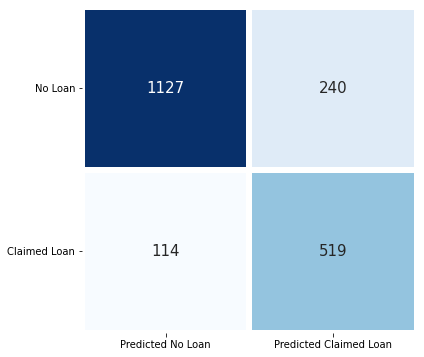

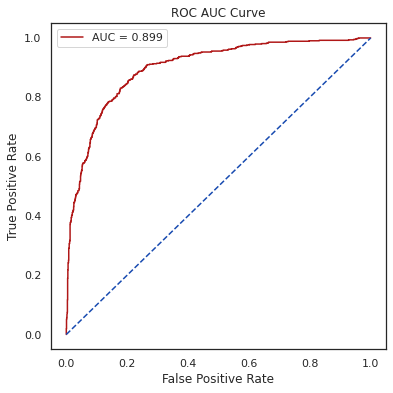

<Figure size 432x432 with 0 Axes>

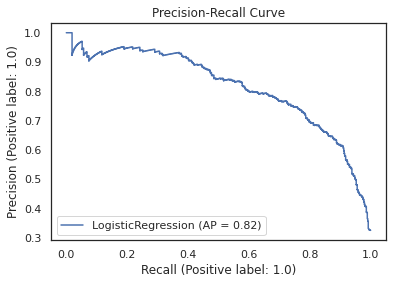

In [25]:
#Fitting Logistic Regression Model
accuracies = {}
classifier = LogisticRegression(C= 0.75, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Logistic Regression'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Logistic Regression Algorithm is 82.3%

### KNeighbors

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84      1367
         1.0       0.65      0.73      0.68       633

    accuracy                           0.79      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.80      0.79      0.79      2000

ROC AUC score: 0.8469844945921178
Accuracy Score:  0.788


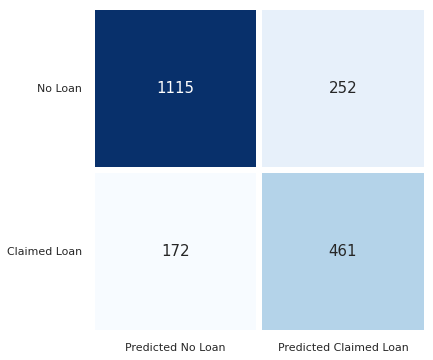

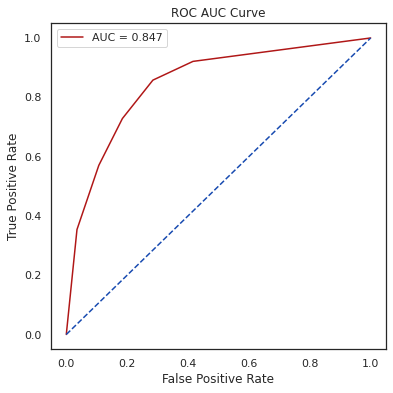

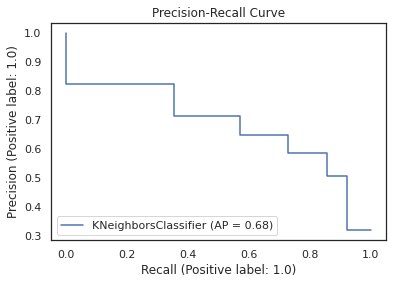

In [26]:
#Fitting KNeighborsClassifier Model
classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['KNeighbors'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> KNN Model's Accuracy is 78.8%

### GaussianNB

              precision    recall  f1-score   support

         0.0       0.90      0.68      0.78      1367
         1.0       0.55      0.83      0.66       633

    accuracy                           0.73      2000
   macro avg       0.72      0.76      0.72      2000
weighted avg       0.79      0.73      0.74      2000

ROC AUC score: 0.8475270740808797
Accuracy Score:  0.731


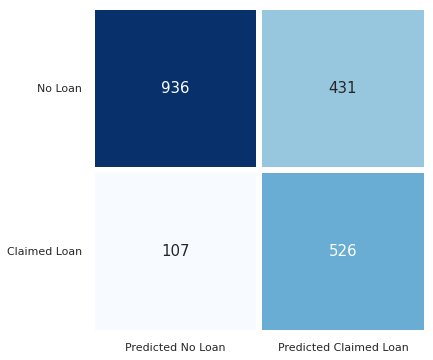

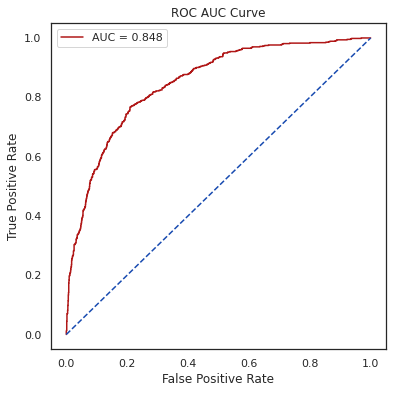

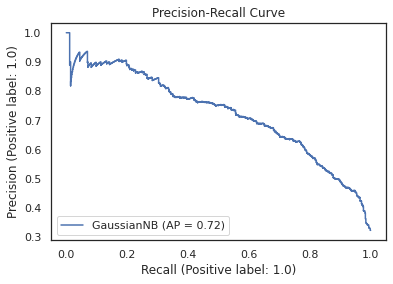

In [27]:
#Fitting GaussianNB Model
classifier = GaussianNB(var_smoothing= 1e-09)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['GaussianNB'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of GaussianNB Algorithm is 73.1%

### Decision Tree

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1367
         1.0       0.66      0.65      0.65       633

    accuracy                           0.78      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.78      0.78      0.78      2000

ROC AUC score: 0.7475913284356723
Accuracy Score:  0.7835


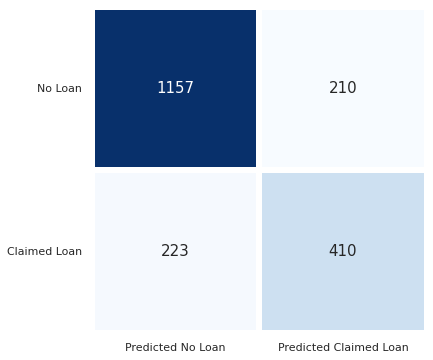

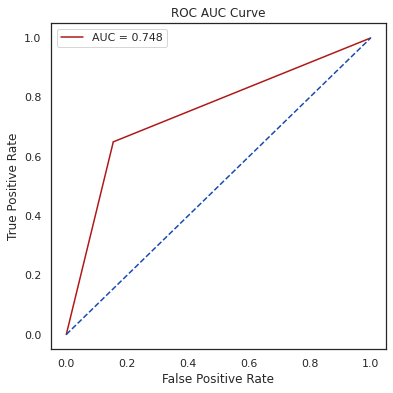

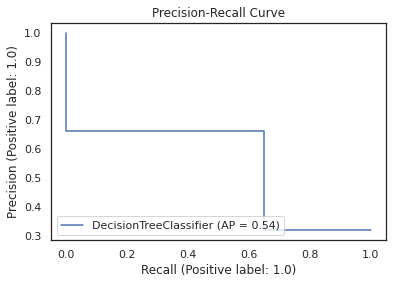

In [28]:
#Fitting DecisionTreeClassifier Model
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Decision Tree'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Decision Tree Algorithm is 78.35%

### Random Forest

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1367
         1.0       0.75      0.71      0.73       633

    accuracy                           0.83      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.83      0.83      0.83      2000

ROC AUC score: 0.9016376770895089
Accuracy Score:  0.833


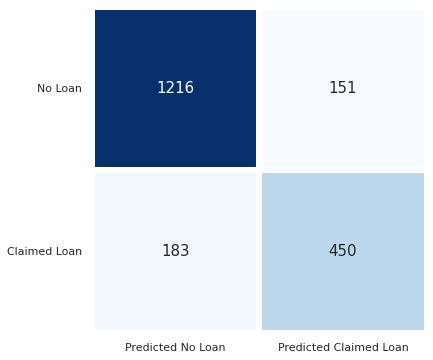

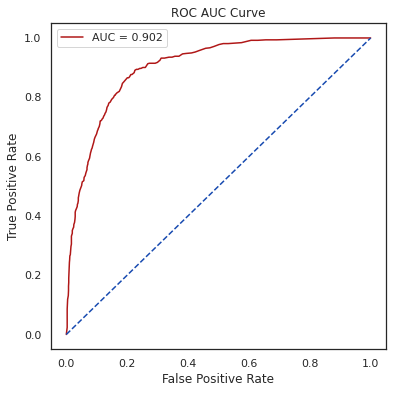

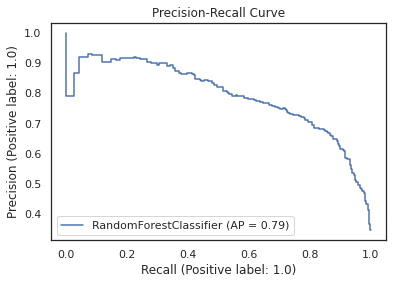

In [29]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'entropy', n_estimators= 150, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Random Forest'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Random Forest Algorithm is 83.3%

---



### AdaBoost

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1367
         1.0       0.74      0.77      0.75       633

    accuracy                           0.84      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.84      0.84      0.84      2000

ROC AUC score: 0.9156176218723673
Accuracy Score:  0.8415


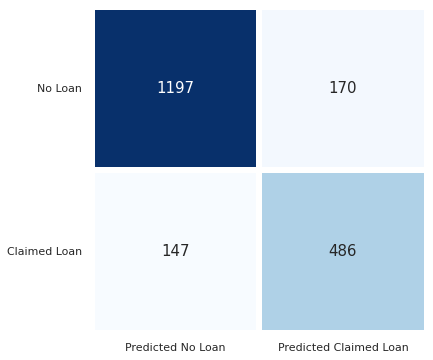

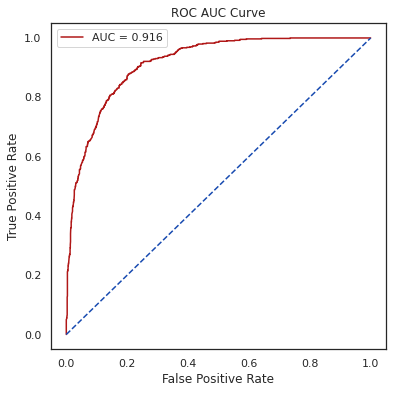

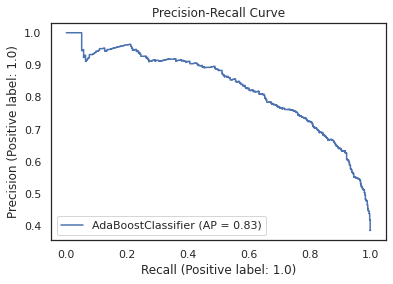

In [30]:
#Fitting AdaBoostClassifier Model
classifier = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.8, n_estimators= 100, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)


#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['AdaBoost'] = acc



sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of AdaBoost Algorithm is 84.15%

### Gradient Boost

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1367
         1.0       0.76      0.79      0.77       633

    accuracy                           0.85      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.85      0.85      0.85      2000

ROC AUC score: 0.9197594853179956
Accuracy Score:  0.852


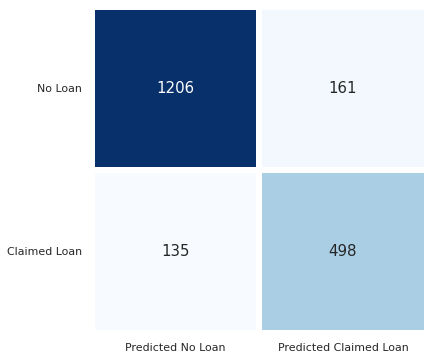

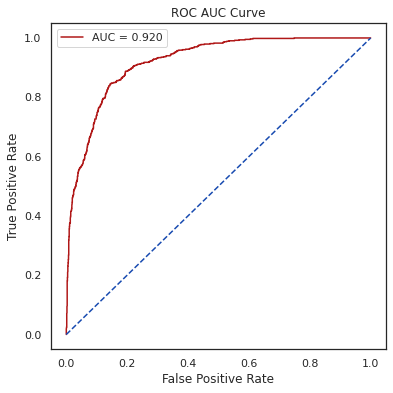

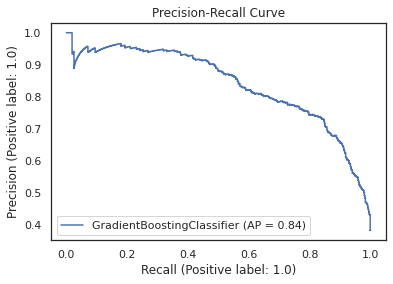

In [31]:
#Fitting GradientBoostingClassifier Model
classifier = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'exponential', n_estimators= 100, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['Gradient Boost'] = acc

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of Gradient Boost Algorithm is 85.2%

### XGBoost

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88      1367
         1.0       0.72      0.82      0.77       633

    accuracy                           0.84      2000
   macro avg       0.82      0.84      0.83      2000
weighted avg       0.85      0.84      0.85      2000

ROC AUC score: 0.9135368670917161
Accuracy Score:  0.8445


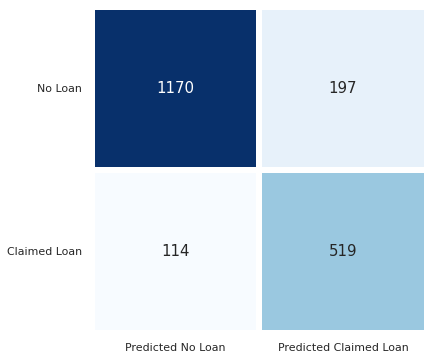

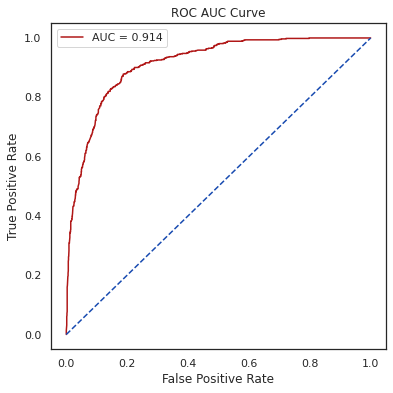

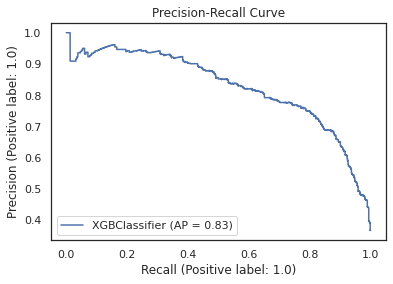

In [32]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['XGBoost'] = acc

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of XGBoost Algorithm is 84.45%

### SVC

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      1367
         1.0       0.68      0.80      0.74       633

    accuracy                           0.82      2000
   macro avg       0.79      0.81      0.80      2000
weighted avg       0.83      0.82      0.82      2000

ROC AUC score: 0.8867580557741669
Accuracy Score:  0.8185


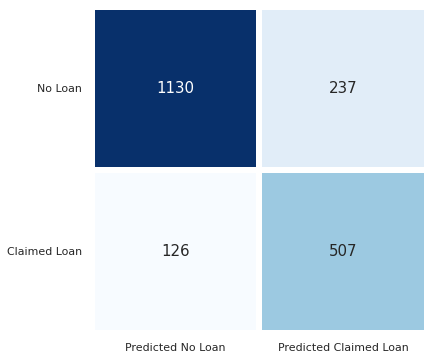

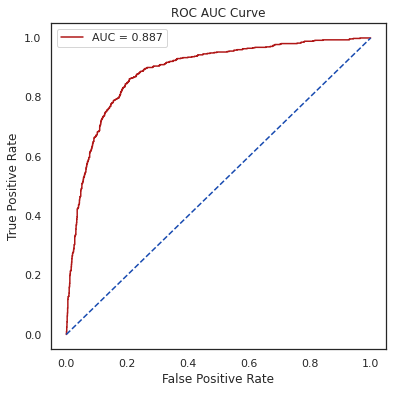

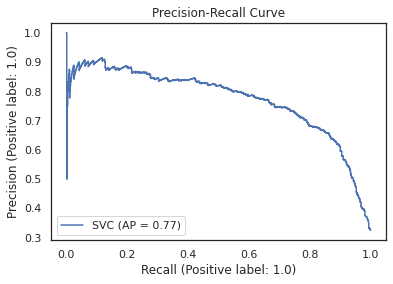

In [33]:
#Fitting SVC Model
classifier = SVC(C= 1, kernel= 'rbf', random_state= 0, probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(y_test, y_pred)*100
accuracies['SVC'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

> Test Accuracy of SVC Algorithm is 81.85%

### Comparing Models

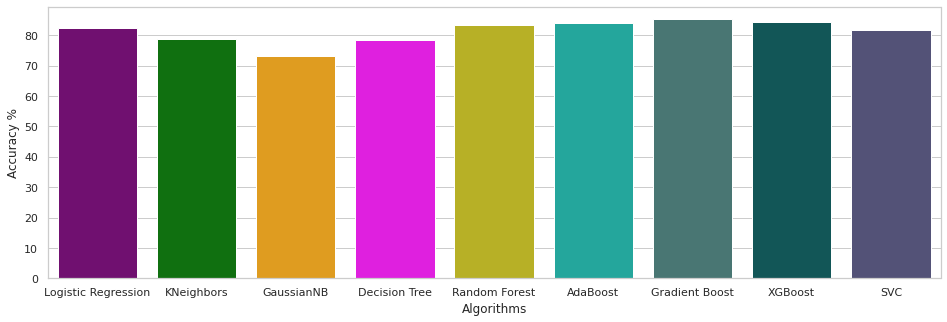

In [36]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [37]:
df_tuned = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_tuned.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_tuned

,Model,Accuracy
6,Gradient Boost,85.20
7,XGBoost,84.45
5,AdaBoost,84.15
4,Random Forest,83.30
0,Logistic Regression,82.30
8,SVC,81.85
1,KNeighbors,78.80
3,Decision Tree,78.35
2,GaussianNB,73.10


# Summary 
* After conducting significant data analysis, I experimented with various classification models to see how well they performed on the dataset. With accuracy, roc, precision, and recall score, I obtained quite decent results.
* I have use SMOTE oversampling method for imbalanced classification data.
*But I didn't stop there; using Grid Search, I fine-tuned the hyperparamters and viewed the classification report, which included ROC AUC and Precision-Recall curves for various models.
* With that, I came to conclusion that ***Random Forest***, ***SVC***, and The Boosting Algoritm (***AdaBoost***, ***Gradient Boost***, ***XGBoost***) are models which are best fit for our dataset.
* After Tuning the Hyperparameter **GradientBoosting** algorithm has the Highest Accuracy of exactly **85.20%** & AUC of **0.92**.


<div style="color:black;
           display:fill;
           border-radius:5px;
           border:2px solid DodgerBlue;
           background-color:white;
           font-size:200%;
           text-align:center;
           letter-spacing:0.5px">
    
    Thank You!
</div>